<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con vecinos cercanos (KNN)

Ejemplo de clasificación utilizando vecinos cercanos para la clasificación de drogadas que debería tomar un pasiente según su historial clínico<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('Telecust1.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Telecust1.csv > Telecust1.csv
    else:
        !wget Telecust1.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Telecust1.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 39899    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 39899  100 39899    0     0  39899      0  0:00:01 --:--:--  0:00:01 77323


### `Telecust1.csv.csv`:
El dataset **`Telecust1.csv.csv`** contiene diferentes tipos de clientes que consumen un servicio de telecomunicación, los cuales deseamos clasificar en 4 categorias.<br> [Dataset source](https://www.kaggle.com/prathamtripathi/customersegmentation)

- **region** --> region, ejemplo 2
- **tenure** --> grado permanencia, ejemplo 40
- **age** --> edad, ejemplo 52
- **income** --> ingresos o sueldo, ejemplo 50 (un número que no representa una moneda real
- **marital** --> si está casado o no
- **address** --> dirección
- **employ** --> empleo
- **retire** --> si está retirado o no
- **genero** --> 0 o 1 (no se sabe cual es cual)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [3]:
df = pd.read_csv("Telecust1.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,77.535000,0.495000,11.551000,2.671000,10.987000,0.047000,0.517000,2.331000
std,0.8162,21.359812,12.558816,107.044165,0.500225,10.086681,1.222397,10.082087,0.211745,0.499961,1.435793
min,1.0000,1.000000,18.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0000,17.000000,32.000000,29.000000,0.000000,3.000000,2.000000,3.000000,0.000000,0.000000,1.000000
50%,2.0000,34.000000,40.000000,47.000000,0.000000,9.000000,3.000000,8.000000,0.000000,1.000000,2.000000
75%,3.0000,54.000000,51.000000,83.000000,1.000000,18.000000,4.000000,17.000000,0.000000,1.000000,3.000000
max,3.0000,72.000000,77.000000,1668.000000,1.000000,55.000000,5.000000,47.000000,1.000000,1.000000,8.000000
Nan,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
%Nan,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
df.head()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,Basic Service
1,3,11,33,136,1,7,5,5,0,0,6,Total Service
2,3,68,52,116,1,24,1,29,0,1,2,Plus Service
3,2,33,33,33,0,12,2,0,0,1,1,Basic Service
4,2,23,30,30,1,9,1,2,0,0,4,Plus Service


In [5]:
print('Cantidad de datos en observacion:', df.shape[0])

Cantidad de datos en observacion: 1000


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [6]:
df.describe()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,77.535000,0.495000,11.551000,2.671000,10.987000,0.047000,0.517000,2.331000
std,0.8162,21.359812,12.558816,107.044165,0.500225,10.086681,1.222397,10.082087,0.211745,0.499961,1.435793
min,1.0000,1.000000,18.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0000,17.000000,32.000000,29.000000,0.000000,3.000000,2.000000,3.000000,0.000000,0.000000,1.000000
50%,2.0000,34.000000,40.000000,47.000000,0.000000,9.000000,3.000000,8.000000,0.000000,1.000000,2.000000
75%,3.0000,54.000000,51.000000,83.000000,1.000000,18.000000,4.000000,17.000000,0.000000,1.000000,3.000000
max,3.0000,72.000000,77.000000,1668.000000,1.000000,55.000000,5.000000,47.000000,1.000000,1.000000,8.000000


In [7]:
# Exploramos que tan balanceado está el dataset,
# como está repartida las categorias entre los clientes actuales
df['custcat'].value_counts()

Plus Service     281
Basic Service    266
Total Service    236
E-Service        217
Name: custcat, dtype: int64

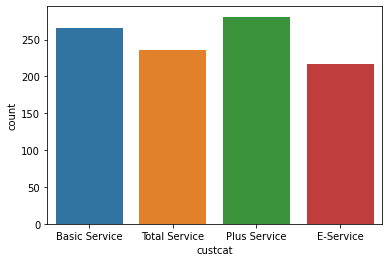

In [8]:
ax = sns.countplot(data=df, x="custcat")

Se puede ver que el dataset está bastante balanceado, no habrá una tendencia marcada

In [9]:
# Nos quedamos con aquellas columnas que podemos entender su relacion con el objetivo
df_clean = df[['tenure', 'age', 'income', 'marital', 'retire', 'gender', 'custcat']]
df_clean

,tenure,age,income,marital,retire,gender,custcat
0,13,44,64,1,0,0,Basic Service
1,11,33,136,1,0,0,Total Service
2,68,52,116,1,0,1,Plus Service
3,33,33,33,0,0,1,Basic Service
4,23,30,30,1,0,0,Plus Service
...,...,...,...,...,...,...,...
995,10,39,27,0,0,1,Basic Service
996,7,34,22,0,0,1,Basic Service
997,67,59,944,0,0,1,Total Service
998,70,49,87,0,0,1,Plus Service


#### Normalización de los datos

Analizar cual es la distribución de los datos numéricos
- tenure
- age
- income

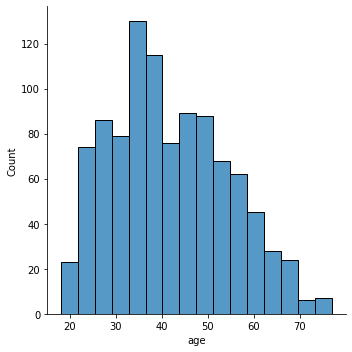

In [10]:
sns.displot(data=df_clean, x='age')

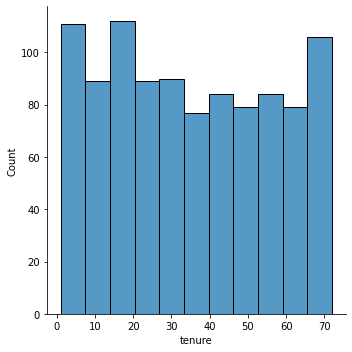

In [11]:
sns.displot(data=df_clean, x='tenure')

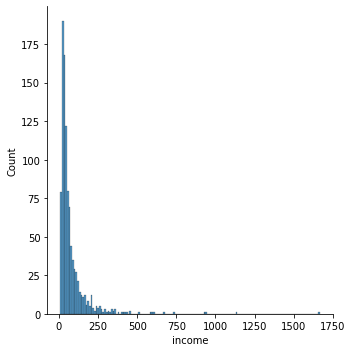

In [12]:
sns.displot(data=df_clean, x='income')

El "ingreso" sigue una distribución normal pero con muchos outliers, es por eso que no utilizaremos el MinMaxScaler sino que se utilizará el StandardScaler a pesar de que "tenure" no siga una distribución normal

In [13]:
from sklearn.preprocessing import StandardScaler
df_norm = df_clean.copy()
age_scaler = StandardScaler()
tenure_scaler = StandardScaler()
income_scaler = StandardScaler()
df_norm.loc[:, 'age'] = age_scaler.fit_transform(df[['age']])
df_norm.loc[:, 'tenure'] = tenure_scaler.fit_transform(df[['tenure']])
df_norm.loc[:, 'income'] = income_scaler.fit_transform(df[['income']])
df_norm.head()

,tenure,age,income,marital,retire,gender,custcat
0,-1.055125,0.184505,-0.126506,1,0,0,Basic Service
1,-1.148806,-0.691812,0.546450,1,0,0,Total Service
2,1.521092,0.821826,0.359517,1,0,1,Plus Service
3,-0.118319,-0.691812,-0.416251,0,0,1,Basic Service
4,-0.586722,-0.930808,-0.444291,1,0,0,Plus Service


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [14]:
X = df_norm.drop('custcat', axis=1).values
y = df_norm['custcat'].values
X.shape

(1000, 6)

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 70%30%

In [15]:
from sklearn.model_selection import train_test_split
# Fijamos un "random_state" constante para que siempre el dataset se parta de la misma forma
# para poder repetir los ensayos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Creamos el modelo base
class RandomBaseModel():
    def __init__(self):
        self.classes_ = [0, 1]
    def fit(self,X, y):
        self.classes_ = np.unique(y)
        return None

    def predict(self,X):
        rand = np.random.randint(0, len(self.classes_), size=X.shape[0])
        rand_clases = [self.classes_[x] for x in rand]
        return np.asarray(rand_clases)

In [17]:
# Obtener la salida según el modelo base
random_model = RandomBaseModel()
random_model.fit(X_train, y_train)
y_hat_base = random_model.predict(X_test)
random_model.classes_

array(['Basic Service', 'E-Service', 'Plus Service', 'Total Service'],
      dtype=object)

#### Crear un modelo de clasificación con vecinos cercanos (KNN)
Parámetros
- n_neighbors --> (k) número de vecinos cercanos

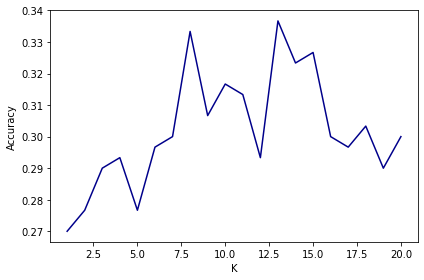

La mejor exactitud se obtuvo con 0.34 con K=13


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

K_MAX = 20
mean_acc = np.zeros((K_MAX))

for i in range(K_MAX):
    # Entrenar el modelo
    clf = KNeighborsClassifier(n_neighbors=(i+1)).fit(X_train,y_train)

    # Prediccion
    y_hat = clf.predict(X_test)   

    # Evaluar el modelo
    mean_acc[i] = accuracy_score(y_test, y_hat)

plt.plot(range(1, K_MAX+1), mean_acc,'darkBlue')
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.tight_layout()
plt.show()

print(f"La mejor exactitud se obtuvo con {mean_acc.max():.2f} con K={mean_acc.argmax()+1}")

In [19]:
clf = KNeighborsClassifier(n_neighbors=13).fit(X_train,y_train)
y_hat = clf.predict(X_test)   

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [20]:
# Calcular la exactitud (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat_base, normalize=True)

0.25666666666666665

In [21]:
# Calcular la exactitud (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

0.33666666666666667

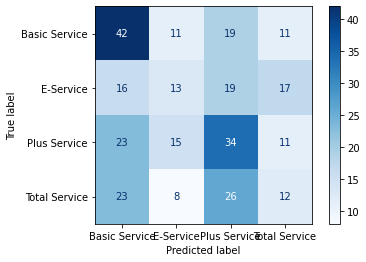

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [23]:
# Supongamos que deseamos ver a que categoría pertenecemos
# dado los siguientes datos
age = 25
tenure = 4
income = df['income'].mean() # ganamos el promedio
marital = 0 # no estamos casados
retire = 0 # no estamos retirados
gender = 1 # solo algun genero

In [24]:
# El scaler espera como entrada una matriz (filas y columnas)
# Por eso el doble corchete
age_numpy = np.array([[age]])
# Utilizamos float para convertir la matriz que retorna el scaler
# a un número
age_norm = float(age_scaler.transform(age_numpy))
tenure_norm = float(tenure_scaler.transform(np.array([[tenure]])))
income_norm = float(tenure_scaler.transform(np.array([[income]])))
# El sistema espera como entrada "X" en este caso una sola fila pero varias
# columnas, por eso el reshape(1, -1) donde el "-1" significa "varias"
# (el sistema determina cuantas)
X_prueba = np.array([age_norm, tenure_norm, income_norm, marital, retire, gender]).reshape(1, -1)
print('Shape:', X_prueba.shape)
print('Valores:\n', X_prueba)

Shape: (1, 6)
Valores:
 [[-1.32913388 -1.47668785  1.9677149   0.          0.          1.        ]]


In [25]:
mi_categoria = clf.predict(X_prueba)
mi_categoria

array(['Total Service'], dtype=object)

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

En este ejemplo se obtuvo muy poca performance, pero se pudo ver como comparar muchos modelos KNN con distintos "K" y a su vez como ingresar un dato nuevo para predecir una categoría. Se podría probar con otros clasificadores pero el problema radica en la falta de datos